In [2]:
import pickle
pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)

In [3]:
X.shape
h = X.shape[1]
w = X.shape[2]

In [4]:
import numpy as np 
import pandas as pd 

In [5]:
vol = X.shape[1:]
prod = np.prod(vol)
x = X.reshape(X.shape[0],prod)

In [6]:
x.shape

(603, 22500)

In [9]:
Y = []
y = list(y)
for i in range(603):
    if(y[i] == 'Anam'):
        Y.append(0)
    elif(y[i] == 'Angad'):
        Y.append(1)
    else:
        Y.append(2)

Y = np.array(Y,dtype=int)
Y

array([2, 2, 2, 1, 0, 2, 1, 0, 0, 0, 2, 2, 1, 0, 2, 1, 0, 2, 1, 2, 0, 2,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 2, 2, 0, 2, 1, 2, 1, 0, 2, 2, 0, 1,
       0, 2, 1, 1, 0, 1, 2, 0, 1, 2, 2, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 2, 1, 0, 2, 2, 1, 2, 2, 1, 2, 2, 0, 2, 0, 2, 0, 2, 0, 0,
       1, 0, 0, 0, 2, 0, 1, 0, 0, 2, 1, 2, 1, 0, 1, 0, 2, 1, 2, 1, 2, 2,
       0, 0, 1, 1, 2, 0, 0, 2, 0, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 1, 0, 0,
       1, 1, 0, 2, 2, 0, 1, 1, 2, 0, 1, 2, 0, 0, 0, 1, 2, 1, 2, 2, 0, 2,
       1, 0, 1, 0, 2, 2, 0, 0, 1, 0, 2, 2, 2, 0, 2, 0, 2, 2, 1, 2, 0, 0,
       0, 0, 0, 0, 2, 1, 2, 2, 2, 0, 0, 0, 2, 0, 0, 0, 2, 1, 2, 2, 0, 0,
       1, 2, 0, 2, 1, 0, 2, 0, 2, 1, 1, 0, 2, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 2, 1, 0, 1, 1, 0, 1, 2, 1, 1, 2, 2, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 2, 2, 1, 2, 0, 1, 2, 0, 2,
       1, 1, 0, 0, 2, 1, 2, 2, 1, 1, 2, 2, 1, 1, 0, 0, 2, 1, 1, 1, 1, 2,
       0, 1, 1, 0, 2, 2, 0, 0, 2, 0, 0, 2, 0, 2, 2,

In [88]:

from sklearn.decomposition import PCA

pca = PCA(n_components=300)
pca.fit(x)

PCA(copy=True, iterated_power='auto', n_components=300, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [89]:
pca_features = pca.transform(x)

In [90]:
import time
import matplotlib.pyplot as plt
import matplotlib.patheffects as PathEffects
%matplotlib inline

import seaborn as sns
sns.set_style('darkgrid')
sns.set_palette('muted')
sns.set_context("notebook", font_scale=1.5,
                rc={"lines.linewidth": 2.5})
RS = 123

In [91]:
# Utility function to visualize the outputs of PCA and t-SNE

def fashion_scatter(x, colors):
    # choose a color palette with seaborn.
    num_classes = len(np.unique(colors))
    palette = np.array(sns.color_palette("hls", num_classes))

    # create a scatter plot.
    f = plt.figure(figsize=(8, 8))
    ax = plt.subplot(aspect='equal')
    sc = ax.scatter(x[:,0], x[:,1], lw=0, s=40, c=palette[colors.astype(np.int)])
    plt.xlim(-25, 25)
    plt.ylim(-25, 25)
    ax.axis('off')
    ax.axis('tight')

    # add the labels for each digit corresponding to the label
    txts = []

    for i in range(num_classes):

        # Position of each label at median of data points.

        xtext, ytext = np.median(x[colors == i, :], axis=0)
        txt = ax.text(xtext, ytext, str(i), fontsize=24)
        txt.set_path_effects([
            PathEffects.Stroke(linewidth=5, foreground="w"),
            PathEffects.Normal()])
        txts.append(txt)

    return f, ax, sc, txts

In [84]:
from sklearn.manifold import TSNE
X = np.array(pca_features)
tsne = TSNE(n_components=2, learning_rate=150, perplexity=30, angle=0.2, verbose=2).fit_transform(X)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 603 samples in 0.042s...
[t-SNE] Computed neighbors for 603 samples in 1.295s...
[t-SNE] Computed conditional probabilities for sample 603 / 603
[t-SNE] Mean sigma: 3008.418023
[t-SNE] Computed conditional probabilities in 0.742s
[t-SNE] Iteration 50: error = 85.5917816, gradient norm = 0.3844653 (50 iterations in 6.490s)
[t-SNE] Iteration 100: error = 90.2577209, gradient norm = 0.3458611 (50 iterations in 7.580s)
[t-SNE] Iteration 150: error = 88.6593246, gradient norm = 0.3740739 (50 iterations in 6.300s)
[t-SNE] Iteration 200: error = 92.4416733, gradient norm = 0.3122263 (50 iterations in 5.012s)
[t-SNE] Iteration 250: error = 86.8970184, gradient norm = 0.4043149 (50 iterations in 4.662s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 86.897018
[t-SNE] Iteration 300: error = 1.5312042, gradient norm = 0.0059772 (50 iterations in 5.385s)
[t-SNE] Iteration 350: error = 1.4259919, gradient norm = 0.000924

(<Figure size 576x576 with 1 Axes>,
 [Text(-0.6834209, 0.614817, '0'),
  Text(3.2388046, 1.9289829, '1'),
  Text(-3.221497, -3.4915535, '2')])

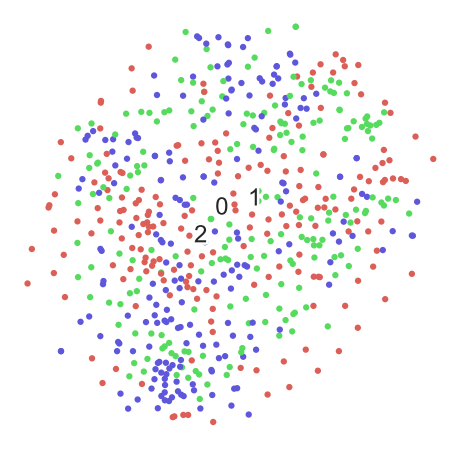

In [92]:
fashion_scatter(tsne,Y)

In [10]:
!jt -l

Available Themes: 
   chesterish
   grade3
   gruvboxd
   gruvboxl
   monokai
   oceans16
   onedork
   solarizedd
   solarizedl


In [12]:
!jt -t monokai  